In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from loguru import logger
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
import regex
import numpy as np
import emoji
import os
import plotly.express as px
import plotly.io as pio
import plotly.subplots as sp
import plotly.graph_objects as go
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import datetime
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

processed = Path(r"C:/Users/a427617/Documents/Master Data science/Blok 3 - Data mining/Data-Mining---2024/data/processed")
print(processed)
datafile = processed / "whatsapp-20240214-112323.parq"
print(datafile)
if not datafile.exists():
    logger.warning("Datafile does not exist. First run src/preprocess.py, and check the timestamp!")

df = pd.read_parquet(datafile)
df.head()

C:\Users\a427617\Documents\Master Data science\Blok 3 - Data mining\Data-Mining---2024\data\processed
C:\Users\a427617\Documents\Master Data science\Blok 3 - Data mining\Data-Mining---2024\data\processed\whatsapp-20240214-112323.parq


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a427617\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,timestamp,author,message,has_emoji,message_length,has_link,hour,day_of_week
0,2017-03-05 15:08:00,Unknown,05-03-2017 15:08 - ‎Bryan Zaagsma heeft de gro...,True,70,False,15:08:00,6
1,2018-05-07 08:09:00,Unknown,07-05-2018 08:09 - ‎Bryan Zaagsma heeft u toeg...,False,53,False,08:09:00,0
2,2018-05-07 08:13:00,Justin Velthuijsen,2\n,False,3,False,08:13:00,0
3,2018-05-07 08:14:00,Kerim Ozel,3\n,False,3,False,08:14:00,0
4,2018-05-07 08:20:00,Stephan van den Hoogen,4\n,False,3,False,08:20:00,0


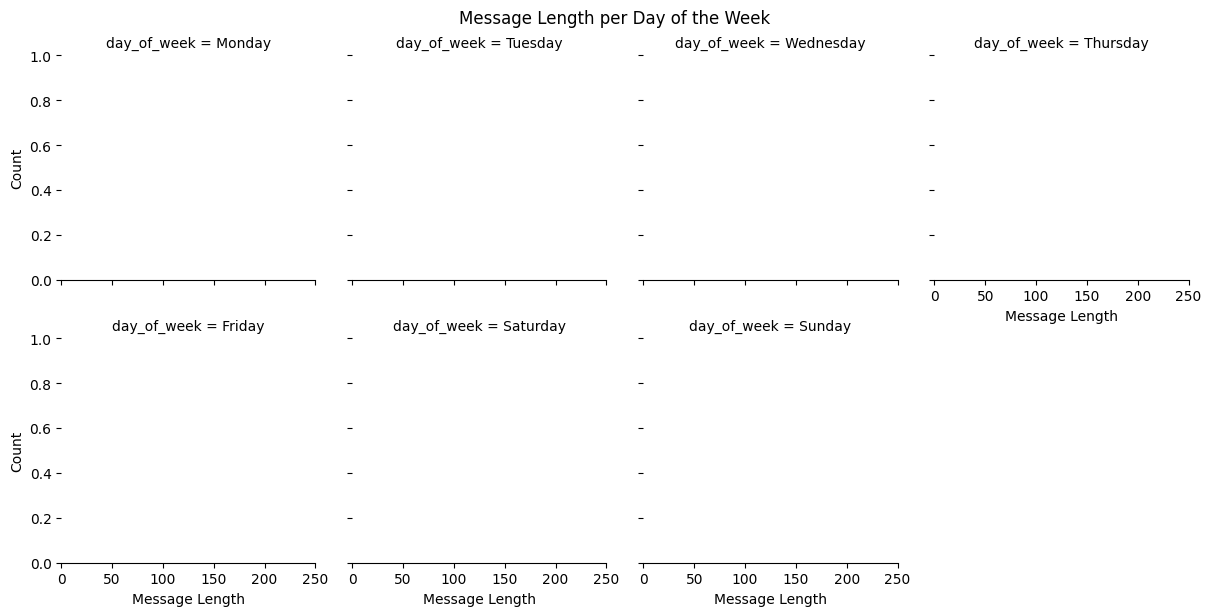

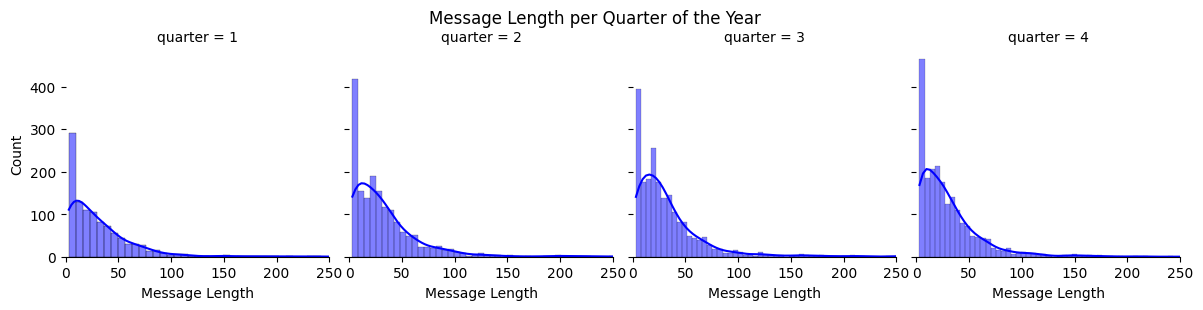

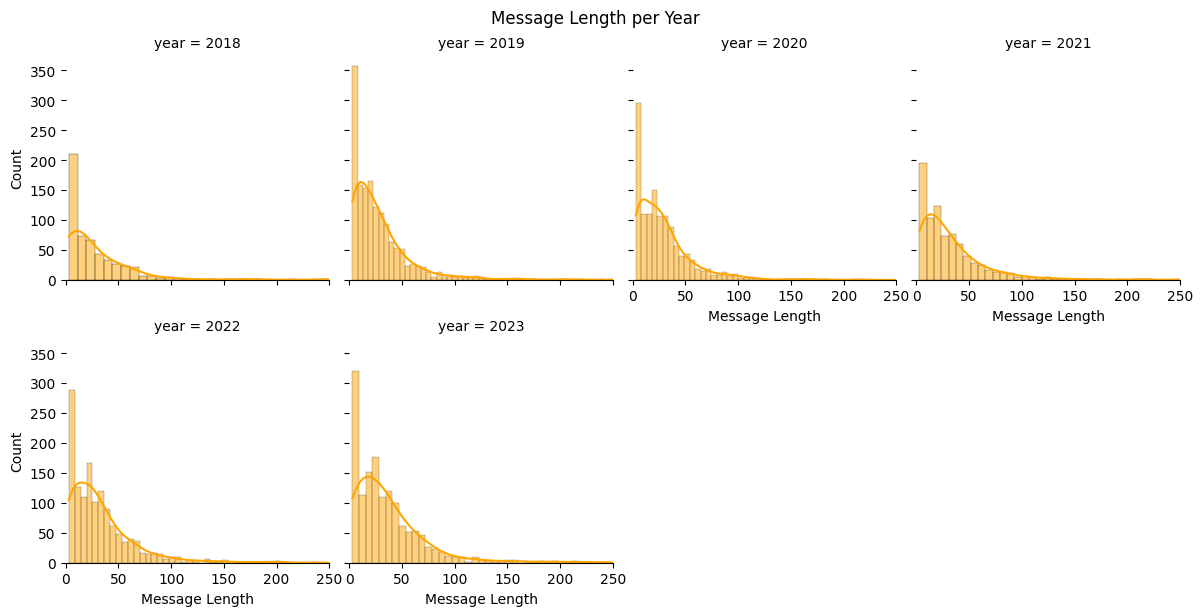

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual name of your DataFrame if different

# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year

# Exclude the years 2017 and 2024
df_filtered = df[(df['year'] != 2017) & (df['year'] != 2024)].copy()  # Use copy() to create a copy

# Extract quarter from timestamp
df_filtered['quarter'] = df_filtered['timestamp'].dt.quarter

# Extract week from timestamp
df_filtered['month'] = df_filtered['timestamp'].dt.to_period('M').astype(str)
df_filtered['week'] = df_filtered['timestamp'].dt.to_period('W').astype(str)
df_filtered['year'] = df_filtered['timestamp'].dt.year

# Specify the save location
save_location = r"C:/Users/a427617/Documents/Master Data science/Blok 3 - Data mining/Data-Mining---2024/img/"

# Create a FacetGrid for message_length per day of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
g_day = sns.FacetGrid(df_filtered, col='day_of_week', col_wrap=4, height=3, col_order=days_order)
g_day.map(sns.histplot, 'message_length', color='green', kde=True)  # Use 'message_length' instead of x="message_length"
g_day.set(xticks=range(0, 300, 50), xlabel="Message Length", ylabel="Count")  # Set x-axis values and labels
g_day.despine(left=True, bottom=False)
g_day.fig.suptitle('Message Length per Day of the Week', y=1.02)

# Create a FacetGrid for message_length per quarter of the year
quarters_order = [1, 2, 3, 4]
g_quarter = sns.FacetGrid(df_filtered, col='quarter', col_wrap=4, height=3, col_order=quarters_order)
g_quarter.map(sns.histplot, 'message_length', color='blue', kde=True)  # Use 'message_length' instead of x="message_length"
g_quarter.set(xticks=range(0, 300, 50), xlabel="Message Length", ylabel="Count")  # Set x-axis values and labels
g_quarter.despine(left=True, bottom=False)
g_quarter.fig.suptitle('Message Length per Quarter of the Year', y=1.02)

# Create a FacetGrid for message_length per year
g_year = sns.FacetGrid(df_filtered, col='year', col_wrap=4, height=3)
g_year.map(sns.histplot, 'message_length', color='orange', kde=True)  # Use 'message_length' instead of x="message_length"
g_year.set(xticks=range(0, 300, 50), xlabel="Message Length", ylabel="Count")  # Set x-axis values and labels
g_year.despine(left=True, bottom=False)
g_year.fig.suptitle('Message Length per Year', y=1.02)

# Set x-axis limit
for ax in g_day.axes.flatten():
    ax.set_xlim(0, 250)

for ax in g_quarter.axes.flatten():
    ax.set_xlim(0, 250)

for ax in g_year.axes.flatten():
    ax.set_xlim(0, 250)

g_day.savefig(save_location + 'message_length_per_day_of_week.png')  # Save the plot
g_quarter.savefig(save_location + 'message_length_per_quarter.png')  # Save the plot
g_year.savefig(save_location + 'message_length_per_year.png')  # Save the plot
# Show the plots
plt.show()


has_emoji month_year  False  True
0            2017-03    NaN   1.0
1            2018-05  128.0  19.0
2            2018-06   16.0   NaN
3            2018-07   19.0   4.0
4            2018-08   13.0   4.0
..               ...    ...   ...
57           2023-10  193.0  14.0
58           2023-11  180.0  19.0
59           2023-12  128.0  10.0
60           2024-01  142.0  11.0
61           2024-02  108.0  13.0

[62 rows x 3 columns]


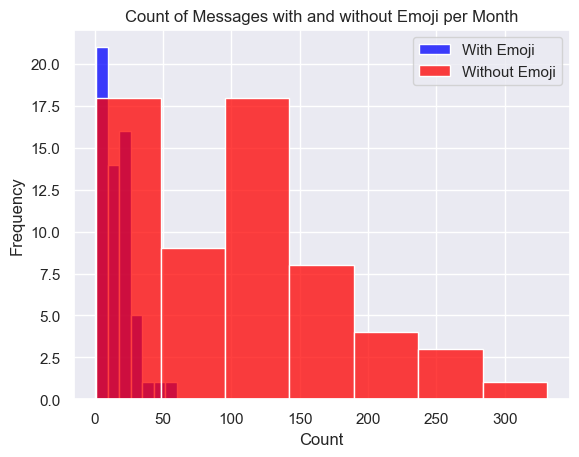

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual name of your DataFrame if different

# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract month and year from timestamp
df['month_year'] = df['timestamp'].dt.to_period('w')

# Create a sum count for the boolean column 'has_emoji' per month
emoji_count_per_month = df.groupby(['month_year', 'has_emoji']).size().unstack().reset_index()
print(emoji_count_per_month)

# Plot the counts
sns.histplot(data=emoji_count_per_month, x=True, element="bars", color="blue", label='With Emoji')
sns.histplot(data=emoji_count_per_month, x=False, element="bars", color="red", label='Without Emoji')

# Add labels and title
plt.title('Count of Messages with and without Emoji per Month')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show the plot
plt.show()


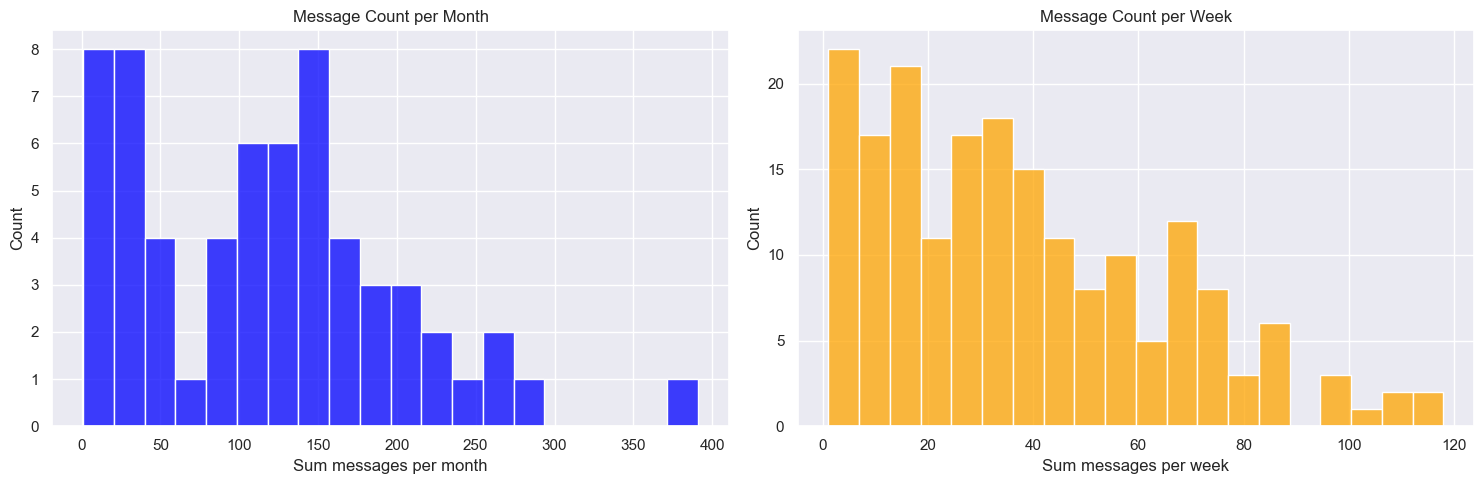

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual name of your DataFrame if different

# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract month, week, and year from timestamp
df['month'] = df['timestamp'].dt.to_period('M').astype(str)
df['week'] = df['timestamp'].dt.to_period('W').astype(str)
df['year'] = df['timestamp'].dt.year

# Create a sum count for messages per month
message_count_per_month = df.groupby(['year', 'month']).size().reset_index(name='count_M')

# Create a sum count for messages per week
message_count_per_week = df.groupby(['year', 'week']).size().reset_index(name='count_W')

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the counts for messages per month
sns.histplot(data=message_count_per_month, x='count_M', bins=20, color='blue', ax=axes[0])

# Add labels and title for monthly counts
axes[0].set_title('Message Count per Month')
axes[0].set_xlabel('Sum messages per month')
axes[0].set_ylabel('Count')

# Plot the counts for messages per week
sns.histplot(data=message_count_per_week, x='count_W', bins=20, color='orange', ax=axes[1])

# Add labels and title for weekly counts
axes[1].set_title('Message Count per Week')
axes[1].set_xlabel('Sum messages per week')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.savefig(r"C:/Users/a427617/Documents/Master Data science/Blok 3 - Data mining/Data-Mining---2024/img/Messages_count_distributie.png")
# Show the plots
plt.show()




<Axes: xlabel='log_len', ylabel='Count'>

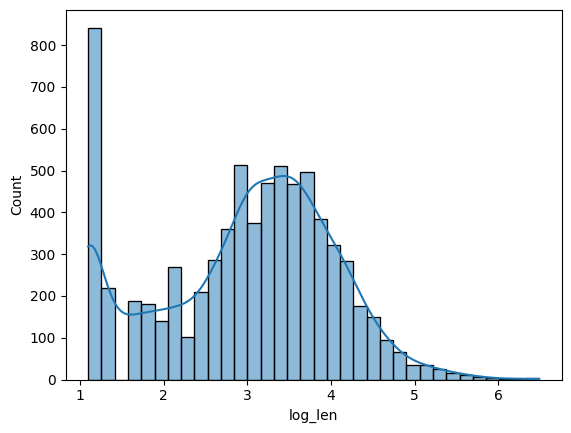

In [3]:
import numpy as np
df["log_len"] = df["message_length"].apply(lambda x: np.log(x))
sns.histplot(df, x="log_len", kde=True)

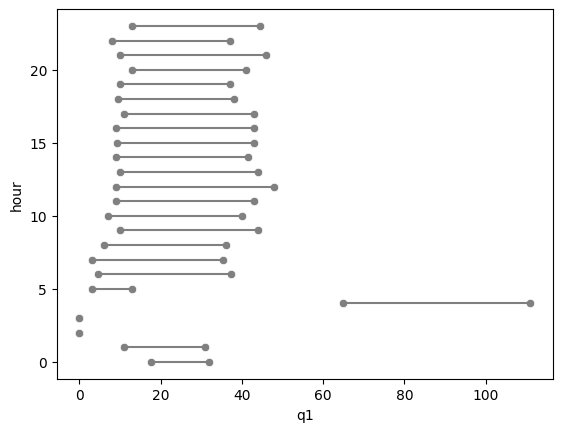

In [11]:
q1 = lambda x: np.quantile(x, 0.25)
q3 = lambda x: np.quantile(x, 0.75)

df["hour"] = df.timestamp.dt.hour
quantiles = df.groupby('hour')['message_length'].agg([q1, q3])
quantiles.columns = ['q1', 'q3']
df.head()

p = quantiles.reindex(range(24), fill_value=0)

sns.scatterplot(data=p, x="q1", y=p.index, color="grey")
sns.scatterplot(data=p, x="q3", y=p.index, color="grey")
for index, row in p.iterrows():
    sns.lineplot(x=[row["q1"], row["q3"]], y=[index, index], color="grey")

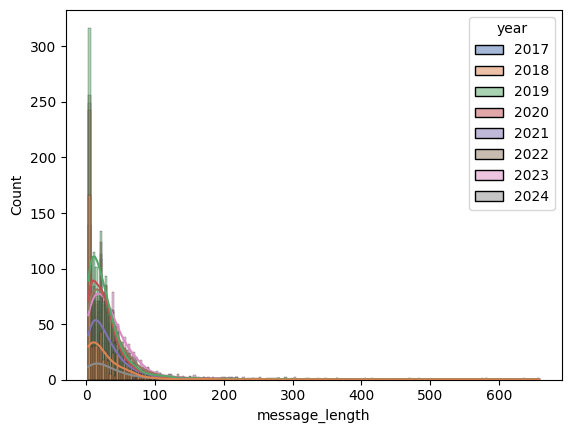

In [24]:
# Create a 'year' column in the DataFrame
df["year"] = df.timestamp.dt.year

# Group by 'year' and calculate the mean of 'message_length'
quantiles = df.groupby('year')['message_length'].mean().reset_index()

# Set the color palette
sns.set_palette("deep")

# Create a histogram with kernel density estimates
sns.histplot(data=df, x="message_length", hue="year", kde=True, palette="deep")

# Show the plot
plt.show()

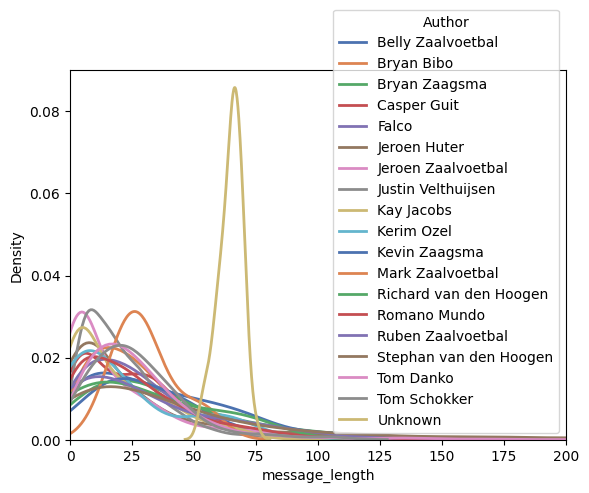

In [51]:

# Create a 'year' column in the DataFrame
df["year"] = df.timestamp.dt.year

# Exclude authors starting with '+31'
df_filtered = df[~df['author'].str.startswith('+31')]

# Set the color palette
sns.set_palette("deep")

# Create a line plot with kernel density estimates for each author
for author, data in df_filtered.groupby('author'):
    sns.kdeplot(data=data['message_length'], label=author, linewidth=2)

# Set x-axis limits
plt.xlim(0, 200)

# Show the plot
plt.legend(title="Author")
plt.show()

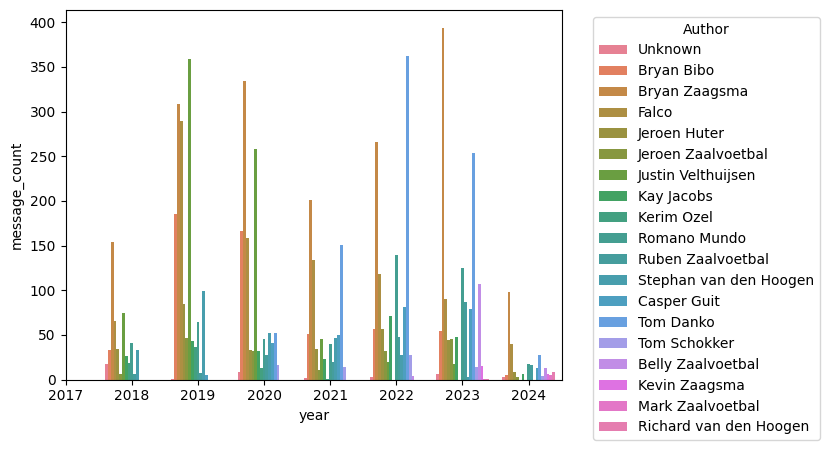

In [52]:
# Create a 'year' column in the DataFrame
df["year"] = df.timestamp.dt.year

# Exclude authors starting with '+31'
df_filtered = df[~df['author'].str.startswith('+31')]

# Group by 'author' and 'year' and calculate the count of messages
message_count = df_filtered.groupby(['author', 'year']).size().reset_index(name='message_count')

# Set the color palette
sns.set_palette("deep")

# Create a bar plot for message count per author per year
sns.barplot(data=message_count, x='year', y='message_count', hue='author')

# Set x-axis limits
plt.xlim(0, None)  # Adjust if needed

# Show the plot
plt.legend(title="Author", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [66]:
# Plot 3: Bar Plot by Message Length with Hue for Time Period
df["time_period"] = pd.cut(df["hour"], bins=[0, 8, 17, 24], labels=["Night", "Day", "Late Night"], right=False)
df_filtered = df[~df['author'].str.startswith('+31')]

sns.barplot(data=df_filtered, x='message_length', y='count', hue='time_period')

plt.title('Message Length Distribution by Time Period')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

ValueError: Could not interpret value `count` for `y`. An entry with this name does not appear in `data`.

In [18]:
df["year"] = df.timestamp.dt.year
quantiles = df.groupby('year')['message_length'].mean()
quantiles.columns = ['Mean']

sns.histplot(df, x="message_length", kde=True)

year
2017    70.000000
2018    29.263941
2019    29.329197
2020    29.105595
2021    32.705097
2022    33.573125
2023    38.019152
2024    35.598540
Name: message_length, dtype: float64


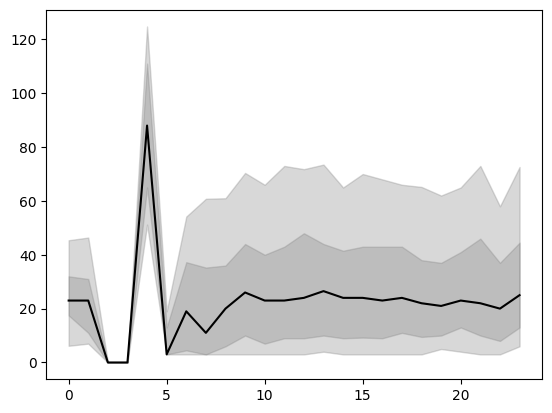

In [5]:
q1 = lambda x: np.quantile(x, 0.1)
q2 = lambda x: np.quantile(x, 0.25)
q3 = lambda x: np.quantile(x, 0.5)
q4 = lambda x: np.quantile(x, 0.75)
q5 = lambda x: np.quantile(x, 0.9)

df["hour"] = df.timestamp.dt.hour
quantiles = df.groupby('hour')['message_length'].agg([q1, q2, q3, q4, q5])
quantiles.columns = ['q1', 'q2', 'q3', 'q4', 'q5']
p = quantiles.reindex(range(24), fill_value=0)

plt.plot(p.index, p["q3"], color="black")
plt.fill_between(p.index, p["q2"], p["q4"], color="grey", alpha=0.3)
plt.fill_between(p.index, p["q1"], p["q5"], color="grey", alpha=0.3)

   year  Win_mentions  Lose_mentions  Draw_mentions
0  2017             0              0              0
1  2018             0              0              0
2  2019             4              2              4
3  2020             6              3              0
4  2021             1              1              0
5  2022             3              4              2
6  2023             2              8              2
7  2024             0              0              0


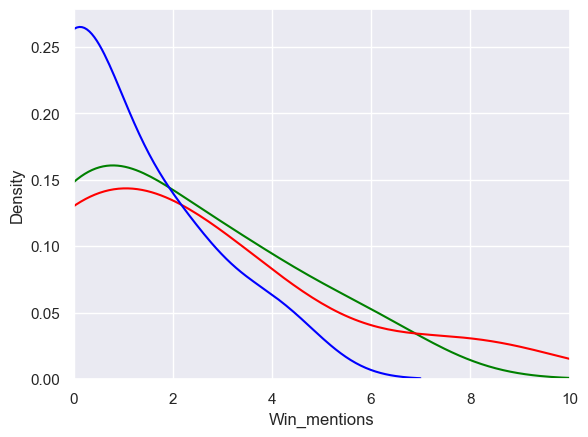

In [93]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

def create_mentions_over_time_plot(df):
    # Convert the 'timestamp' column to datetime, if it's not already
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract year from timestamp
    df['year'] = df['timestamp'].dt.year

    # Define regex patterns for each word category
    word_patterns = {
        'Win': re.compile(r'\b(?:Win|winst|gewonnen)\b', re.IGNORECASE),
        'Lose': re.compile(r'\b(?:Lose|verloren)\b', re.IGNORECASE),
        'Draw': re.compile(r'\b(?:Gelijk|gelijkspel)\b', re.IGNORECASE)
    }

    # Count occurrences of each word category in each message
    for category, pattern in word_patterns.items():
        df[f'{category}_mentions'] = df['message'].apply(lambda x: len(pattern.findall(x)))

    # Group by year and calculate the total number of mentions for each word category
    mentions_over_time = df.groupby('year')[[f'{category}_mentions' for category in word_patterns]].sum().reset_index()

    print(mentions_over_time)

    sns.kdeplot(mentions_over_time, x="Win_mentions", color="green")
    sns.kdeplot(mentions_over_time, x="Lose_mentions", color="red")
    sns.kdeplot(mentions_over_time, x="Draw_mentions", color="blue")
    plt.xlim(0, 10)


    

# Example usage:
# Assuming 'df' is your DataFrame
create_mentions_over_time_plot(df)


   year  Win_mentions  Lose_mentions  Draw_mentions
2  2019             4              2              4
3  2020             6              3              0
4  2021             1              1              0
5  2022             3              4              2
6  2023             2              8              2
7  2024             0              0              0


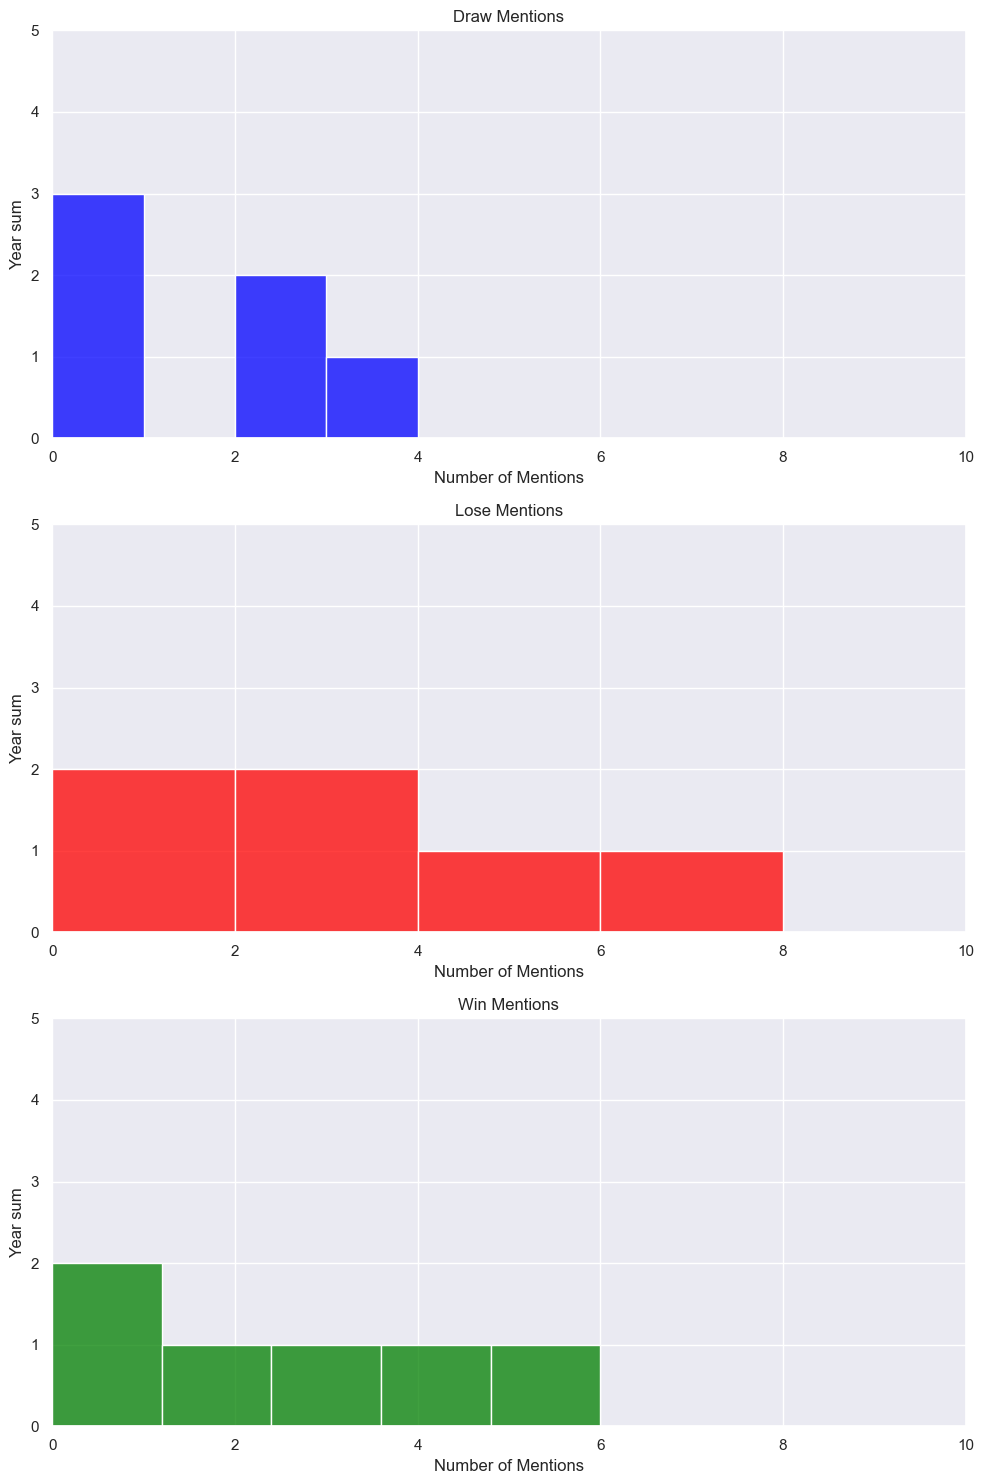

In [114]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

def create_mentions_over_time_plot(df):
    # Convert the 'timestamp' column to datetime, if it's not already
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract year from timestamp
    df['year'] = df['timestamp'].dt.year

    # Define regex patterns for each word category
    word_patterns = {
        'Win': re.compile(r'\b(?:Win|winst|gewonnen)\b', re.IGNORECASE),
        'Lose': re.compile(r'\b(?:Lose|verloren)\b', re.IGNORECASE),
        'Draw': re.compile(r'\b(?:Gelijk|gelijkspel)\b', re.IGNORECASE)
    }

    # Count occurrences of each word category in each message
    for category, pattern in word_patterns.items():
        df[f'{category}_mentions'] = df['message'].apply(lambda x: len(pattern.findall(x)))

    # Group by year and calculate the total number of mentions for each word category
    mentions_over_time = df.groupby('year')[[f'{category}_mentions' for category in word_patterns]].sum().reset_index()
    
    # print(mentions_over_time)
    # Create subplots
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))

    # Filter data for years > 2019
    mentions_over_time = mentions_over_time[mentions_over_time['year'] >= 2019]
    print(mentions_over_time)
    # Plot 'Draw' mentions
    sns.histplot(data=mentions_over_time, x="Draw_mentions", element="bars", color="blue", ax=axes[0])
    axes[0].set_title('Draw Mentions')
    axes[0].set_xlabel('Number of Mentions')
    axes[0].set_ylabel('Year sum')
    axes[0].set_xlim(0, 10)
    axes[0].set_ylim(0, 5)

    # Plot 'Lose' mentions
    sns.histplot(data=mentions_over_time, x="Lose_mentions", element="bars", color="red", ax=axes[1])
    axes[1].set_title('Lose Mentions')
    axes[1].set_xlabel('Number of Mentions')
    axes[1].set_ylabel('Year sum')
    axes[1].set_xlim(0, 10)
    axes[1].set_ylim(0, 5)

    # Plot 'Win' mentions
    sns.histplot(data=mentions_over_time, x="Win_mentions", element="bars", color="green", bins=5, ax=axes[2])
    axes[2].set_title('Win Mentions')
    axes[2].set_xlabel('Number of Mentions')
    axes[2].set_ylabel('Year sum')
    axes[2].set_xlim(0, 10)
    axes[2].set_ylim(0, 5)

    # Adjust layout
    plt.tight_layout()
    plt.show() 

# Example usage:
# Assuming 'df' is your DataFrame
create_mentions_over_time_plot(df)
